## 4.7 LightGBM

**LightGBM**  

1. 장점  
    - XGBoost보다 학습에 걸리는 시간이 훨씬 적다  
    - 메모리 사용량도 상대적으로 적다  
    - 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)  
    - 대용량 데이터에 대한 뛰어난 예측 성능 및 병렬 컴퓨팅 기능을 제공하고 있으며, 최근에는 GPU까지 지원하고 있다
    
    
2. 예측 성능  
    - LightGBM과 XGBBoost의 예측 성능은 별다른 차이가 없다.  
    - 기능상의 다양성은 LightGBM이 XGBoost보다 약간 더 많다.  
    
    
3. 단점  
    - 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다  
    - 일반적으로 10,000건 이하의 데이터 세트 정도를 적은 데이터 세트라고 기술하고 있다.  
    
    
4. 방식  
    - 리프 중심 트리 분할 방식을 사용한다.  
    - 트리의 균형을 맞추지 않고, 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성된다.  
   → 이러한 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다.
   
   
5. 사이킷런 래퍼 LightGBM 클래스는 분류를 위한 LGBMClassifier 클래스와 회귀를 위한 LGBMRegressor 클래스이다.   

### LightGBM 하이퍼 파라미터

**주요 파라미터**  
1. num_iterations [default = 100]  
    - 반복 수행하려는 트리의 개수를 지정   
    - 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있다.  
    
    
2. learning_rate [default = 0.1]  
    - 0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값  
    - 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 과적합과 학습 시간이 길어지는 문제가 발생할 수 있다.  
   
   
3. max_depth [default = 20]   
    - 0보다 작은 값을 지정하면 깊이에 제한이 없다.  
    - LightGBM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊다.  
    
    
4. min_data_in leaf [default = 20]  
    - 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터이다.  
    
    
5. num_leaves [default = 31]  
    - 하나의 트리가 가질 수 있는 최대 리프 개수  
    
    
6. boosting [default = gbdt]  
    - 부스팅의 트리를 생성하는 알고리즘을 기술  
    - gbdt : 일반적인 그래디언트 부스팅 결정 트리  
    - rf : 랜덤 포레스트  
    
    
7. bagging_fraction [default = 1.0]  
    - 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율 지정  
    
    
8. feature_fraction [default = 1.0] 
    - 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율  
    - 과적합을 막기 위해 사용된다.  
    
    
9. lambda_l2 [default = 0.0]  
    - L2 regulation 제어를 위한 값  
    - 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소효과가 있다.  
    
    
10. lambda_l1 [default = 0.0]  
    - L1 regulation 제어를 위한 값  
    - L2와 마찬가지로 과적합 제어를 위한 것이다
    

<br>

**Learning Task 파라미터**  
1. objective  
    - 최솟값을 가져야 할 손실함수를 정의  
    - 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라 objective인 손실함수가 지정된다.  
   

### 하이퍼 파라미터 튜닝 방안

- num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수이고 LightGBM 모델의 복잡도를 제어하는 주요 파라미터이다. 일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커진다.  


- min_data_in_leaf는 사이킷런 래퍼 클래스에서는 min_child_samples로 이름이 바뀐다. 과적합을 개선하기 위한 중요한 파라미터이다. num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지한다. 


- max_depth는 명시적으로 깊이의 크기를 제한한다. num_leaves, dmin_data_in_leaf와 결합해 과적합을 개선하는 데 사용한다. 


---

learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이므로 이를 적용하는 것도 좋다. 물론 n_estimators를 너무 크게 하는 것은 과적합으로 오히려 성능이 저하될 수 있음을 유념해야 한다.  

이밖에 과적합을 제어하기 위해서 reg_labmda, reg_alpha와 같은 reglarization을 적용하거나 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용할 수 있다.

### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

| 파이썬 래퍼 LightGBM | 사이킷런 래퍼 LightGBM | 사이킷런 래퍼 XGBoost |
|:----------:|:----------:|----------:|
| num_iterations | n_estimators | n_estimators |
| learning_rate | learning_rate | learning_rate |
| max_depth | max_depth | max_depth |
| min_data_in_leaf | min_child_samples | N/A | 
| bagging_fraction | subsample | subsample |
| feature_fraction | colsample_bytree | colsample_bytree | 
| lambda_l2 | reg_labmda | reg_lambda | 
| lambda_l1 | reg_alpha | reg_alpha | 
| early_stopping_round | early_stopping_rounds | early_stopping_rounds |
| num_leaves | num_leaves | N/A |
| min_sum_hessian_in_leaf | min_child_weight | min_child_weight | 

### LightGBM 적용 - 위스콘신 유방암 예측

In [3]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
get_clf_eval(y_test, preds)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9395


정확도가 약 94.74%로 앞 예제의 XGBoost인 경우의 약 96.49%보다 작지만, 학습 데이터 세트와 테스트 데이터 세트 크기가 작아서 알고리즘 간 성능 비교는 큰 의미가 없다.

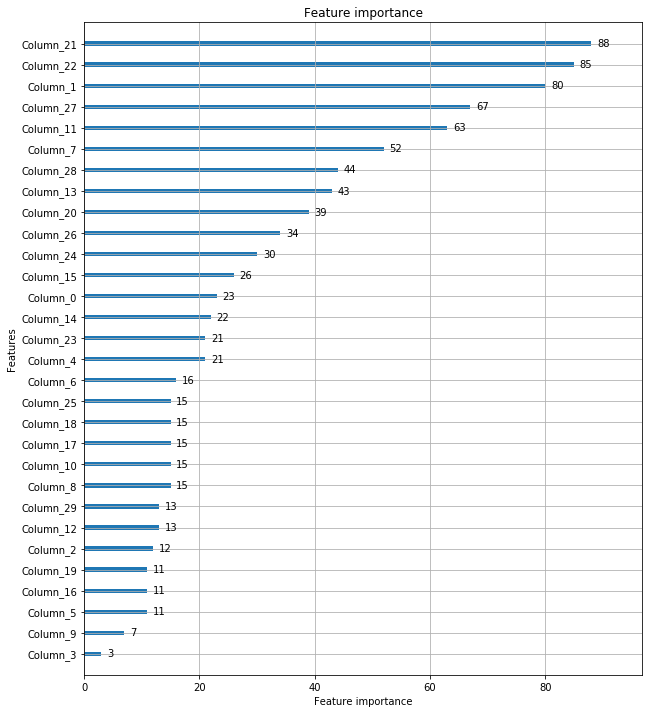

In [6]:
# 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

Column_0은 첫 번째 피처, Column_1는 두 번째 피처를 의미